# TEXT
    

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
%pylab inline
import copy
from googletrans import Translator
import pandas as pd
import numpy as np
import csv
import re
import jieba
import time
import json
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import linear_model
from sklearn.externals import joblib
from nltk.corpus import stopwords as e_stopwords
from datetime import datetime, timedelta
import jieba
import sys

from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize

Populating the interactive namespace from numpy and matplotlib


In [2]:
train1= pd.read_csv("G:\\preprocessed_1.csv")

In [4]:
train2= pd.read_csv("G:\\preprocessed_2.csv")

In [7]:
frames=[train1,train2]
train=pd.concat(frames)

In [8]:
train.shape[0]

1223517

In [69]:
translated=train

## TEXT PREPROCESSING
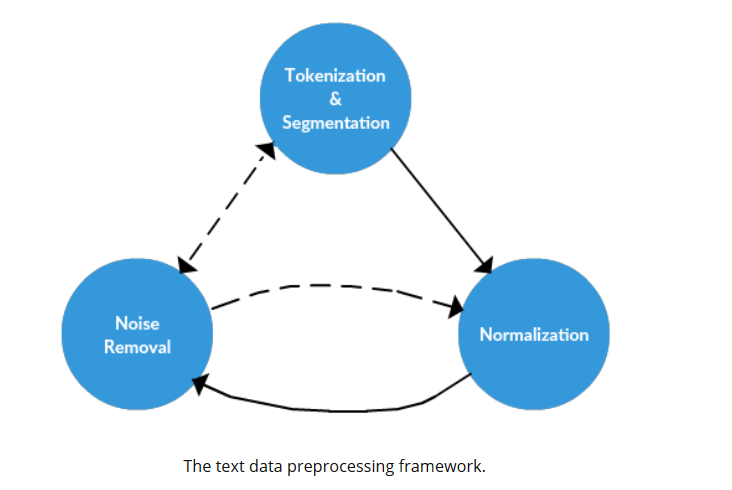

## REMOVAL OF NOISE - URL

In [70]:
def remurl(content):
    try:
        URLless_string = re.sub(r'\w+:\/{2}[\d\w-]+(\.[\d\w-]+)*(?:(?:\/[^\s/]*))*', '', content)
        return URLless_string
    except Exception as e:
        print(str(e))
        return content
    

# Removal of numbers

In [71]:
 def rem_num(tokens):
        try:
            for item in tokens:
                if item.isdigit():    
                    tokens.remove(item)
            return tokens
        except Exception as e:
            print(str(e))
            return tokens

## REMOVAL OF STOPWORDS

In [72]:
remStopword=pd.DataFrame()

In [73]:
def removeStopwords(data):
    stopw="STOPWORDS.txt"
    stop_words = set(stopwords.words('english')) 
    words = word_tokenize(data)
    wordsFiltered = []
    try:
        for w in words:
            if (w not in stopw or w not in stop_words) :
                wordsFiltered.append(w)
        return wordsFiltered
    except Exception as e:
        print(str(e))
        return data

## STEMMING

In [74]:
import nltk
from nltk.stem.porter import PorterStemmer
porter_stemmer = PorterStemmer()


In [75]:
def stemming(tokens):
    # First Word tokenization
    nltk_tokens =tokens 
    stem = []
    #Next find the roots of the word
    try:
        for w in nltk_tokens:
            s=porter_stemmer.stem(w)
            stem.append(s)
        return stem
    except Exception as e:
        print(str(e))
        return tokens

## LEMMATIZATION

In [76]:
###LEMMATIZATION
import nltk
from nltk.stem import WordNetLemmatizer

In [77]:
def lemmatization(tokens):
    wordnet_lemmatizer = WordNetLemmatizer()
    nltk_tokens =tokens 
    lem = []
    #Next find the roots of the word
    try:
        for w in nltk_tokens:
            l=wordnet_lemmatizer.lemmatize(w)
            lem.append(l)
        return lem
    except Exception as e:
        print(str(e))
        return tokens

In [78]:
#nltk.download('wordnet')

## Converting to lower case

In [79]:
def tolower(tokens):
    try:
        nltk_tokens=tokens
        x = [element.lower() for element in nltk_tokens] 
        return x
    except Exception as e:
        print(str(e))
        return tokens


In [80]:
 def rem_punctuation(tokens):
        try:
            input_text = ' '.join(tokens).lower()
            s = re.sub(r"[-()\"#/@;:<>{}`+=~|.!?,]", "", input_text)
            #print(input_text)
            words = word_tokenize(s)
            return words
        except Exception as e:
            print(str(e))
            return tokens

In [81]:
## REMOVE PUNTUATION

In [105]:
df_urlrem = pd.DataFrame(columns=['en_contenturl','url_rem'])
for i in range(10):
    non_emo=translated['en_content'].iloc[i]
    content=translated['en_content'].iloc[i]
    new_content=remurl(content)
    
    df_urlrem = df_urlrem.append({'en_contenturl': non_emo,'url_rem':new_content}, ignore_index=True)
print("done1")    
df_remnum = pd.DataFrame(columns=['url_rem',])
for i in range(10):
    content=df_urlrem['url_rem'].iloc[i]
    nonum=rem_num(df_urlrem['url_rem'].iloc[i])
    list1=[content,nonum]
    df_remnum = df_remnum.append({'url_rem': content, 'no_num': nonum}, ignore_index=True)
print("done2")
df_new = pd.DataFrame(columns=['no_num','Stopwrod_removed'])
for i in range(10):
    non_emo=df_remnum['no_num'].iloc[i]
    letters_only = re.sub("[^a-zA-Z]"," ",str(df_remnum['no_num'].iloc[i]))
    remStopword=removeStopwords(letters_only)
    list1=[non_emo,remStopword]
    df_new = df_new.append({'no_num': non_emo, 'Stopword_removed': remStopword}, ignore_index=True)    
print("done3")    
df_stem = pd.DataFrame(columns=['en_contentst','Stemming'])
for i in range(10):
    content=df_new['Stopword_removed'].iloc[i]
    stem=stemming(df_new['Stopword_removed'].iloc[i])
    list1=[content,stem]
    df_stem = df_stem.append({'en_contentst': content, 'Stemming': stem}, ignore_index=True)
print("done4")    
df_lem = pd.DataFrame(columns=['Stemmingle','lemmatization'])
for i in range(10):
    content=df_stem['Stemming'].iloc[i]
    lem=stemming(df_stem['Stemming'].iloc[i])
    list1=[content,lem]
    df_lem = df_lem.append({'Stemmingle': content, 'lemmatization': lem}, ignore_index=True)
print("done5")    
df_lower = pd.DataFrame(columns=['lemmatizationtl','lower'])
for i in range(10):
    content=df_lem['lemmatization'].iloc[i]
    low=tolower(df_lem['lemmatization'].iloc[i])
    list1=[content,low]
    df_lower = df_lower.append({'lemmatizationtl': content, 'lower': low}, ignore_index=True)
print("done6") 
df_rempunc = pd.DataFrame(columns=['lemmatizationtlp','no_punc'])
for i in range(10):
    content=df_lower['lemmatizationtl'].iloc[i]
    nopun=rem_punctuation(df_lower['lemmatizationtl'].iloc[i])
    list1=[content,nopun]
    df_rempunc = df_rempunc.append({'lemmatizationtlp': content, 'no_punc': nopun}, ignore_index=True)
print("done7") 
df_rempunc.to_csv("G://preprocessed_FULL.csv", sep=',',index=False, encoding= 'utf-8')

done1
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
'str' object has no attribute 'remove'
done2
done3
done4
done5
done6
done7


In [89]:
frames=[translated,df_urlrem, df_new, df_stem, df_lem, df_lower, df_remnum, df_rempunc]

In [93]:
Train=Train.reset_index(inplace=True, drop=True)

In [104]:
df_rempunc

,lemmatizationtlp,no_punc
0,"[lijiang, tourism, sz, stock, stock, financ, i...","[lijiang, tourism, sz, stock, stock, financ, i..."
1,"[chen, ling, ding, red, envelop, to, make, mon...","[chen, ling, ding, red, envelop, to, make, mon..."
2,"[taobao, these, sucker, industri, ga, fire, no...","[taobao, these, sucker, industri, ga, fire, no..."
3,"[aspect, can, not, say, you, know, everyth, la...","[aspect, can, not, say, you, know, everyth, la..."
4,"[over, zhang]","[over, zhang]"
5,"[lifetim, My, favorit, up, with, the, main, bo...","[lifetim, my, favorit, up, with, the, main, bo..."
6,"[On, uniqlo, dress, room, sound, insul, is, go...","[on, uniqlo, dress, room, sound, insul, is, go..."
7,"[So, ordinari, everyday, scene, but, also, how...","[so, ordinari, everyday, scene, but, also, how..."
8,"[overh, of, red, xxiii, tanggua, children, sti...","[overh, of, red, xxiii, tanggua, children, sti..."
9,"[there, are, good, thing, to, share, with, you...","[there, are, good, thing, to, share, with, you..."


In [102]:
Train

In [30]:
Train.to_csv("G://preprocessed2L.csv", sep=',',index=False, encoding= 'utf-8')

In [106]:
df=pd.read_csv("G://preprocessed_FULL.csv")

In [107]:
df

,lemmatizationtlp,no_punc
0,"['lijiang', 'tourism', 'sz', 'stock', 'stock',...","['lijiang', 'tourism', 'sz', 'stock', 'stock',..."
1,"['chen', 'ling', 'ding', 'red', 'envelop', 'to...","['chen', 'ling', 'ding', 'red', 'envelop', 'to..."
2,"['taobao', 'these', 'sucker', 'industri', 'ga'...","['taobao', 'these', 'sucker', 'industri', 'ga'..."
3,"['aspect', 'can', 'not', 'say', 'you', 'know',...","['aspect', 'can', 'not', 'say', 'you', 'know',..."
4,"['over', 'zhang']","['over', 'zhang']"
5,"['lifetim', 'My', 'favorit', 'up', 'with', 'th...","['lifetim', 'my', 'favorit', 'up', 'with', 'th..."
6,"['On', 'uniqlo', 'dress', 'room', 'sound', 'in...","['on', 'uniqlo', 'dress', 'room', 'sound', 'in..."
7,"['So', 'ordinari', 'everyday', 'scene', 'but',...","['so', 'ordinari', 'everyday', 'scene', 'but',..."
8,"['overh', 'of', 'red', 'xxiii', 'tanggua', 'ch...","['overh', 'of', 'red', 'xxiii', 'tanggua', 'ch..."
9,"['there', 'are', 'good', 'thing', 'to', 'share...","['there', 'are', 'good', 'thing', 'to', 'share..."
